In [1]:
!git clone https://github.com/AvonYangXX1/AMPLify-Feedback.git
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cloning into 'AMPLify-Feedback'...
remote: Enumerating objects: 506, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 506 (delta 76), reused 141 (delta 69), pack-reused 351
Receiving objects: 100% (506/506), 255.40 MiB | 29.03 MiB/s, done.
Resolving deltas: 100% (243/243), done.
Updating files: 100% (101/101), done.


In [9]:
pip install Bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.4/279.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 61.3 MB/s eta 0:00:00


In [10]:
from Bio.Align import PairwiseAligner
from Bio.Align import substitution_matrices

def calculate_blosum62_score(seq1, seq2):
    aligner = PairwiseAligner()
    aligner.substitution_matrix = substitution_matrices.load("BLOSUM62")
    aligner.open_gap_score = -10
    aligner.extend_gap_score = -0.5
    score = aligner.score(seq1, seq2)  # Get the best score
    return score

In [11]:
amp0_data =pd.read_csv("/content/AMPLify-Feedback/source_data/AMP0_data.csv")
amp0_data

,DBAASP ID,C-terminus modification,N-terminus modification,Sequence,Target species,MIC (?g/mL )
0,4446,#,#,GLPRKILCAIAKKKGKAKGPLKLVCKA,Bacillus subtilis,1.416819
1,4446,#,#,GLPRKILCAIAKKKGKAKGPLKLVCKA,Staphylococcus aureus,283.363770
2,4446,#,#,GLPRKILCAIAKKKGKAKGPLKLVCKA,Escherichia coli,155.850074
3,4446,#,#,GLPRKILCAIAKKKGKAKGPLKLVCKA,Pseudomonas aeruginosa,184.186451
4,4446,#,#,GLPRKILCAIAKKKGKAKGPLKLVCKA,Candida albicans,198.354639
...,...,...,...,...,...,...
30707,4444,#,#,GLPRKILCAIAKKKGKCKGPLKLVCKC,Escherichia coli,121.706243
30708,4444,#,#,GLPRKILCAIAKKKGKCKGPLKLVCKC,Pseudomonas aeruginosa,289.776770
30709,4444,#,#,GLPRKILCAIAKKKGKCKGPLKLVCKC,Candida albicans,72.444192
30710,8091,#,#,sHkWlWlW,Staphylococcus aureus,10.000000


In [12]:
generated_seq = pd.read_csv("/content/AMPLify-Feedback/Bacteria2Peptide/bacteria2peptide.csv")
generated_seq

,Unnamed: 0,0,1,2
0,0,Bacillus_subtilis,GVlKLLKKFLKFAKI,1.792013
1,1,Staphylococcus_aureus,TVyLLLKKFKKFAKDAI,2.636046
2,2,Escherichia_coli,TVyLkNKKkKKFAKDAI,0.757396
3,3,Pseudomonas_aeruginosa,TVKKLFIFLL,3.093960
4,4,Candida_albicans,TVlKLFKFFKLFAKI,4.174263
...,...,...,...,...
320,320,Ralstonia_solanacearum,GVlKLLKKFLKFAKI,2.700380
321,321,Corynebacterium_michiganense,GVKKLFKKFLKAKI,2.801601
322,322,Cytophaga_drobachiensis,TVyLkNKKkKLFAKDAI,2.330757
323,323,Pseudomonas_acidovorans,TVlKLFKFFLLKI,1.947692


In [15]:
amp0_data_unique

,DBAASP ID,C-terminus modification,N-terminus modification,Sequence,Target species,MIC (?g/mL )
0,4446,#,#,GLPRKILCAIAKKKGKAKGPLKLVCKA,Bacillus subtilis,1.416819
5,4447,#,#,GLPRKILAAIAKKKGKCKGPLKLVAKC,Bacillus subtilis,11.901278
10,6972,AMD,#,LRKAKKIAKKLF,Pectobacterium carotovorum,10.000000
16,11542,AMD,#,GSGSGSGSLKKIFKKPMVIGVTIPF,Klebsiella pneumoniae,9.000000
19,11540,#,#,GFGCPLNERECHSHCQSIGRKFGYCGGTLRLTCICGKE,Klebsiella pneumoniae,1.040443
...,...,...,...,...,...,...
30683,5637,AMD,ACT,KQLIRFLKRLDRNLWGLA,Escherichia coli,10.083126
30689,6975,AMD,#,KRRLILRILRLAIRALVKKR,Pectobacterium carotovorum,10.000000
30695,8480,AMD,#,AIHDILKYGKPS,Escherichia coli,67.077715
30700,8488,AMD,#,GIHAILKYGKPS,Escherichia coli,64.175910


In [16]:
amp0_data_unique = amp0_data.drop_duplicates(subset=['Sequence'])

results = []

for i in range(len(generated_seq )):
    for j in range(len(amp0_data_unique)):
        peptide_vis = generated_seq['1'].iloc[i].upper()
        peptide_amp = amp0_data_unique['Sequence'].iloc[j].upper()
        score = calculate_blosum62_score(peptide_vis, peptide_amp)
        results.append({
            "VIS_Sequence": peptide_vis,
            "AMP_Sequence": peptide_amp,
            "BLOSUM62_Score": score
        })

results_df = pd.DataFrame(results)


if results_df.empty:
    print("No valid comparisons were made.")
else:
    print(results_df)

            VIS_Sequence                            AMP_Sequence  \
0        GVLKLLKKFLKFAKI             GLPRKILCAIAKKKGKAKGPLKLVCKA   
1        GVLKLLKKFLKFAKI             GLPRKILAAIAKKKGKCKGPLKLVAKC   
2        GVLKLLKKFLKFAKI                            LRKAKKIAKKLF   
3        GVLKLLKKFLKFAKI               GSGSGSGSLKKIFKKPMVIGVTIPF   
4        GVLKLLKKFLKFAKI  GFGCPLNERECHSHCQSIGRKFGYCGGTLRLTCICGKE   
...                  ...                                     ...   
1670170  TVYLKNKKKKLFAKI                      KQLIRFLKRLDRNLWGLA   
1670171  TVYLKNKKKKLFAKI                    KRRLILRILRLAIRALVKKR   
1670172  TVYLKNKKKKLFAKI                            AIHDILKYGKPS   
1670173  TVYLKNKKKKLFAKI                            GIHAILKYGKPS   
1670174  TVYLKNKKKKLFAKI                                SHKWLWLW   

         BLOSUM62_Score  
0                  -6.0  
1                   0.0  
2                  -1.5  
3                  -7.0  
4                 -18.0  
...                 ...  
1

In [17]:
negative_scores_df = results_df[results_df['BLOSUM62_Score'] < 0]

print(negative_scores_df)

            VIS_Sequence                            AMP_Sequence  \
0        GVLKLLKKFLKFAKI             GLPRKILCAIAKKKGKAKGPLKLVCKA   
2        GVLKLLKKFLKFAKI                            LRKAKKIAKKLF   
3        GVLKLLKKFLKFAKI               GSGSGSGSLKKIFKKPMVIGVTIPF   
4        GVLKLLKKFLKFAKI  GFGCPLNERECHSHCQSIGRKFGYCGGTLRLTCICGKE   
5        GVLKLLKKFLKFAKI                                KSKWLWLW   
...                  ...                                     ...   
1670170  TVYLKNKKKKLFAKI                      KQLIRFLKRLDRNLWGLA   
1670171  TVYLKNKKKKLFAKI                    KRRLILRILRLAIRALVKKR   
1670172  TVYLKNKKKKLFAKI                            AIHDILKYGKPS   
1670173  TVYLKNKKKKLFAKI                            GIHAILKYGKPS   
1670174  TVYLKNKKKKLFAKI                                SHKWLWLW   

         BLOSUM62_Score  
0                  -6.0  
2                  -1.5  
3                  -7.0  
4                 -18.0  
5                 -20.5  
...                 ...  
1

In [24]:
len(negative_scores_df)/len(results_df)*100

87.63381082820662

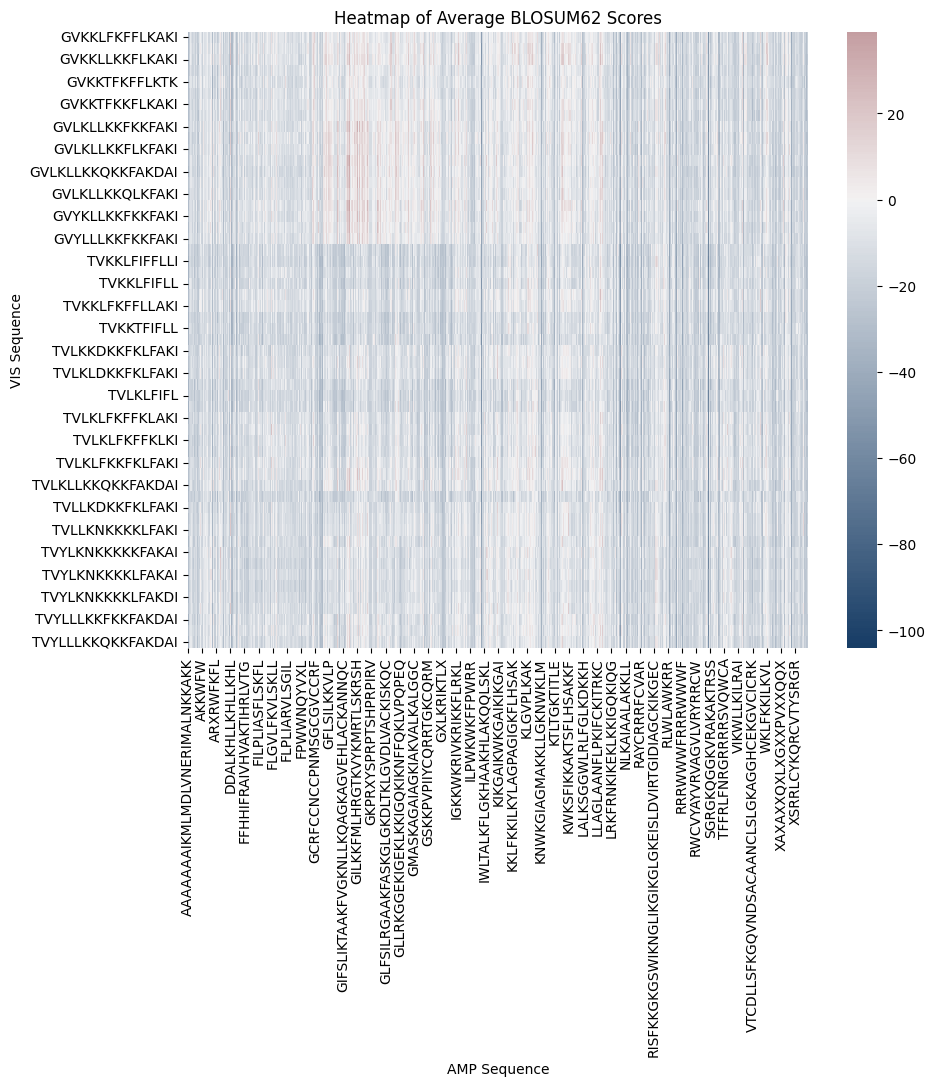

In [22]:
df = results_df
agg_df = df.groupby(['VIS_Sequence', 'AMP_Sequence']).BLOSUM62_Score.mean().reset_index()

# Pivot the DataFrame
pivot_df = agg_df.pivot_table(index='VIS_Sequence', columns='AMP_Sequence', values='BLOSUM62_Score')

cmap = sns.diverging_palette(250, 10, s=85, l=25, n=9, as_cmap=True)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap=cmap, center=0)
plt.title('Heatmap of Average BLOSUM62 Scores')
plt.xlabel("AMP Sequence")
plt.ylabel("VIS Sequence")
plt.savefig("heatmap.png")  # Save the figure
plt.show()